In [1]:
import crocoddyl
import pinocchio
from IPython.display import HTML
import mim_solvers
import numpy as np
from matplotlib import animation
from matplotlib import pyplot as plt
from PointMass_utils import *
from PointMass_model import DifferentialActionModelPointMass

In [2]:
nx = 4
nu = 2
target_low = np.array([10, 0, 0, 0])
target_high = np.array([10, 10, 0, 0])
obs1 = Obstacle(3.5, 3.5, 1)
obs2 = Obstacle(6.5, 6.5, 1)
obs3 = Obstacle(6.5, 3.5, 1)
obs_set = (obs1, obs2, obs3)
translation_cost = XReg(nx, target_high)
ureg = UReg(nu, None)

cost_set = Costs()
cost_set.add_cost(translation_cost)
cost_set.add_cost(ureg)
cost_set.add_cost(obs1)
cost_set.add_cost(obs2)
cost_set.add_cost(obs3)

nr = cost_set.nr

In [3]:
T = 100

In [4]:
# Desired Running and Terminal Model
w_run = np.array([1., 1., 10.,10.,10.])
PM_DAM_running = DifferentialActionModelPointMass(cost_set, w_run)
w_term = np.array([100., 1., 10.,10.,10.])
PM_DAM_terminal = DifferentialActionModelPointMass(cost_set, w_term)
w_des = np.hstack([w_run, w_term]).copy()
pmDataRunning = PM_DAM_running.createData()
pmDataTerminal = PM_DAM_terminal.createData()
PM_ND_R = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_running, False)
PM_ND_T = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_terminal, False)
timeStep = 5e-2
PM_IAM = crocoddyl.IntegratedActionModelEuler(PM_ND_R, timeStep)
PM_IAM_T = crocoddyl.IntegratedActionModelEuler(PM_ND_T, 0.0)
x0 = np.array([0.0, 0.0, 0.0, 0.0])
u0 = np.array([0.0, 0.0])
problem = crocoddyl.ShootingProblem(x0, [PM_IAM] * T, PM_IAM_T)
# Creating the SQP solver
sqp_opt = mim_solvers.SolverSQP(problem)
sqp_opt.setCallbacks([crocoddyl.CallbackVerbose()])
sqp_opt.with_callbacks=True
sqp_opt.termination_tolerance = 5e-4
xs_init = [x0 for i in range(T+1)]
us_init = [u0 for i in range(T)]

# Solving this problem
done = sqp_opt.solve(xs_init, us_init, 500)
xs_optimal = np.stack(sqp_opt.xs.tolist().copy())
us_optimal = np.stack(sqp_opt.us.tolist().copy())
print(done)

iter     merit         cost         grad      step    ||gaps||        KKT
   1  1.05000e+04  1.05000e+04  2.03219e+01  1.0000  0.00000e+00  9.99777e+02
   2  1.89239e+02  1.89239e+02  1.34747e-02  1.0000  6.12566e-14  1.68491e-01
   3  1.89193e+02  1.89193e+02  1.27272e-02  1.0000  2.42338e-11  1.33003e-01
   4  1.89153e+02  1.89153e+02  1.20427e-02  1.0000  2.71830e-11  1.05990e-01
   5  1.89117e+02  1.89117e+02  1.14106e-02  1.0000  2.33396e-11  8.50670e-02
   6  1.89085e+02  1.89085e+02  1.08237e-02  1.0000  2.28550e-11  7.84847e-02
   7  1.89056e+02  1.89056e+02  1.02864e-02  1.0000  2.30938e-11  7.48566e-02
   8  1.89029e+02  1.89029e+02  9.79997e-03  1.0000  2.51144e-11  7.18126e-02
   9  1.89004e+02  1.89004e+02  9.35499e-03  1.0000  2.32643e-11  6.93005e-02
  10  1.88982e+02  1.88982e+02  8.94739e-03  1.0000  2.14046e-11  6.96155e-02
iter     merit         cost         grad      step    ||gaps||        KKT
  11  1.88960e+02  1.88960e+02  8.57524e-03  1.0000  2.13634e-11  7.1343

processing the animation ... 
... processing done


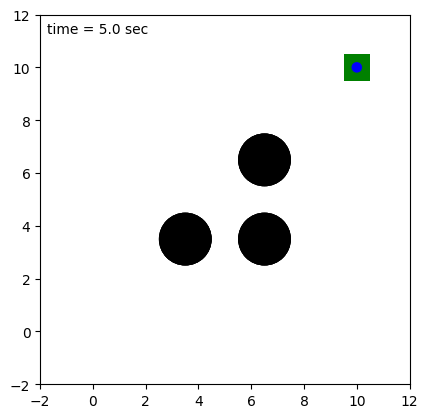

In [5]:
HTML(animatePointMass(xs_optimal, obs_set, target_high).to_jshtml())

In [6]:
# Bad Running and Terminal Model
w_run = np.array([1., 1., 1.,1.,1.])
PM_DAM_running = DifferentialActionModelPointMass(cost_set, w_run)
w_term = np.array([10., 1., 1.,1.,1.])
PM_DAM_terminal = DifferentialActionModelPointMass(cost_set, w_term)
w_bad = np.hstack([w_run, w_term]).copy()
pmDataRunning = PM_DAM_running.createData()
pmDataTerminal = PM_DAM_terminal.createData()
PM_ND_R = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_running, False)
PM_ND_T = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_terminal, False)
timeStep = 5e-2
PM_IAM = crocoddyl.IntegratedActionModelEuler(PM_ND_R, timeStep)
PM_IAM_T = crocoddyl.IntegratedActionModelEuler(PM_ND_T, 0.0)
x0 = np.array([0.0, 0.0, 0.0, 0.0])
u0 = np.array([0.0, 0.0])
problem = crocoddyl.ShootingProblem(x0, [PM_IAM] * T, PM_IAM_T)
# Creating the SQP solver
sqp_non_opt = mim_solvers.SolverSQP(problem)
sqp_non_opt.setCallbacks([crocoddyl.CallbackVerbose()])
sqp_non_opt.with_callbacks=True
sqp_non_opt.termination_tolerance = 5e-4
xs_init = [x0 for i in range(T+1)]
us_init = [u0 for i in range(T)]

# Solving this problem
done = sqp_non_opt.solve(xs_init, us_init, 500)
xs_non_optimal = np.stack(sqp_non_opt.xs.tolist().copy())
us_non_optimal = np.stack(sqp_non_opt.us.tolist().copy())
print(done)

iter     merit         cost         grad      step    ||gaps||        KKT
   1  1.50000e+03  1.50000e+03  2.03267e+01  1.0000  0.00000e+00  9.99396e+01
   2  1.74897e+02  1.74897e+02  2.66496e-01  1.0000  5.93831e-14  6.67138e-01
   3  1.74840e+02  1.74840e+02  2.58825e-01  1.0000  5.82025e-10  1.17501e-01
   4  1.74815e+02  1.74815e+02  3.27860e-02  1.0000  6.45145e-10  1.58020e-02
 END  1.74814e+02  1.74814e+02  1.52682e-03   ----   7.75625e-11  4.39901e-04
True


processing the animation ... 
... processing done


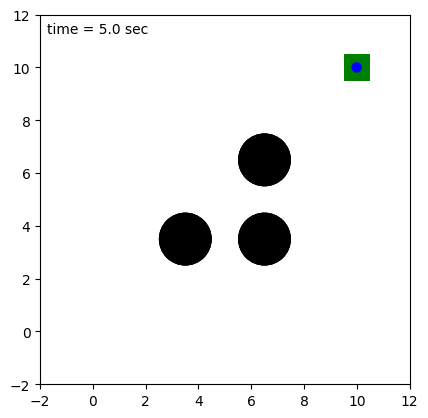

In [7]:
HTML(animatePointMass(xs_non_optimal, obs_set, target_high).to_jshtml())

In [8]:
print('Desired Trajectory Cost:  ', cost_set.traj_cost(xs_optimal, us_optimal, w_des[:nr], w_des[nr:], timeStep), ' || other Trajectory, same cost:   ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_des[:nr], w_des[nr:], timeStep))
print('Bad Trajectory Cost:      ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_bad[:nr], w_bad[nr:], timeStep), ' || other Trajectory, same cost:   ', cost_set.traj_cost(xs_optimal, us_optimal, w_bad[:nr], w_bad[nr:], timeStep))

Desired Trajectory Cost:   58.536632069114354  || other Trajectory, same cost:    71.8707847835795
Bad Trajectory Cost:       43.73308634877133  || other Trajectory, same cost:    43.350851184637484


In [9]:
###### IRL #######

In [10]:
# generating bad trajectories
num_bad = 5
xs_non_optimal_set = []
us_non_optimal_set = []
xs_non_optimal_set.append(np.stack(xs_non_optimal.tolist()).copy())
us_non_optimal_set.append(np.stack(us_non_optimal.tolist()).copy())
for _ in range(num_bad):
    Us = us_non_optimal.copy()+np.random.normal(0,0.1,np.stack(us_non_optimal.tolist()).shape)
    Xs = xs_non_optimal.copy()+np.random.normal(0,0.1,np.stack(xs_non_optimal.tolist()).shape)
    us_non_optimal_set.append(Us)
    xs_non_optimal_set.append(Xs)

In [11]:
# for X, U in zip(xs_non_optimal_set, us_non_optimal_set):
#     print(np.exp(-cost_set.traj_cost(X,U,w_bad[:nr], w_bad[nr:], timeStep)))

1.0161595945959461e-19
3.451749933871205e-21
2.6632711511593415e-20
6.825793253571932e-20
6.556432751877641e-21
1.8753608887771094e-20


In [12]:
# generating good trajectories
num_good = 5
xs_optimal_set = []
us_optimal_set = []
xs_optimal_set.append(np.stack(xs_optimal.tolist()).copy())
us_optimal_set.append(np.stack(us_optimal.tolist()).copy())
for _ in range(num_good):
    Us = us_optimal.copy()+np.random.normal(0,0.05,np.stack(us_optimal.tolist()).shape)
    Xs = xs_optimal.copy()+np.random.normal(0,0.05,np.stack(xs_optimal.tolist()).shape)
    us_optimal_set.append(Us)
    xs_optimal_set.append(Xs)

In [13]:
# IRL Algorithm
from scipy.optimize import minimize
from scipy.optimize import Bounds

def fcn_w(x, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda = 0.001):
    nr = cost_set.nr
    output = 0
    num = np.nextafter(0,1)
    den = np.nextafter(0,1)
    num += np.exp(-cost_set.traj_cost(xs_optimal, us_optimal, x[:nr], x[nr:], dt))
    den += num
    for Xs, Us in zip(xs_non_optimal_set, us_non_optimal_set):
        den += np.exp(-cost_set.traj_cost(Xs, Us, x[:nr], x[nr:], dt))

    output -= np.log(num/den)
    output += Lambda*np.linalg.norm(x)
    return output

def fcn_w_nD(x, cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda = 0.001):
    nr = cost_set.nr
    output = 0
    for Xs_opt, Us_opt in zip(xs_optimal_set, us_optimal_set):
        num = np.nextafter(0,1)
        den = np.nextafter(0,1)
        num += np.exp(-cost_set.traj_cost(Xs_opt, Us_opt, x[:nr], x[nr:], dt))
        den += num
        for Xs, Us in zip(xs_non_optimal_set, us_non_optimal_set):
            den += np.exp(-cost_set.traj_cost(Xs, Us, x[:nr], x[nr:], dt))
        output -= np.log(num/den)
    
    output += Lambda*np.linalg.norm(x)
    return output



In [ ]:
dt = timeStep
Lambda = 0.0
lb = 0; ub = np.inf
bnds = Bounds(lb, ub)
options = {'maxiter': 100, 'iprint': -1,'ftol': 1e-10 ,'gtol' : 1e-10}
tol = 1e-10
x0 = w_bad
# x0 = 1000*np.ones_like(w_bad)
res_1D = minimize(fcn_w, 
               x0, 
               args=(cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda), 
               bounds=bnds, 
               method='L-BFGS-B', 
               tol = tol,
               options=options)

print(res_1D)
w_irl_1D = res_1D.x

res_nD = minimize(fcn_w_nD, 
               x0, 
               args=(cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda), 
               bounds=bnds, 
               method='L-BFGS-B', 
               tol = tol,
               options=options)

print(res_nD)
w_irl_nD = res_nD.x

# w_irl_nD = w_irl_1D

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 3.916427190229002e-09
        x: [ 2.841e+00  0.000e+00  1.624e+01  2.878e+01  8.181e+00
             1.548e+01  1.000e+00  1.006e+00  1.310e+00  1.325e+00]
      nit: 27
      jac: [ 1.110e-08  2.220e-08  0.000e+00  0.000e+00  0.000e+00
             0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
     nfev: 506
     njev: 46
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>


In [ ]:
print('Desired: ')
print('Running ==>    ', w_des[:nr])
print('Terminal ==>   ', w_des[nr:])
print('Bad: ')
print('Running ==>    ', w_bad[:nr])
print('Terminal ==>   ', w_bad[nr:])
print('IRL 1-D: ')
print('Running ==>    ', w_irl_1D[:nr])
print('Terminal ==>   ', w_irl_1D[nr:])
print('IRL N-D: ')
print('Running ==>    ', w_irl_nD[:nr])
print('Terminal ==>   ', w_irl_nD[nr:])

In [ ]:
print('Desired Trajectory Cost: ', cost_set.traj_cost(xs_optimal, us_optimal, w_des[:nr], w_des[nr:], timeStep), ' || with IRL (1D) Weight:  ', cost_set.traj_cost(xs_optimal, us_optimal, w_irl_1D[:nr], w_irl_1D[nr:], timeStep))
print('Bad Trajectory Cost:     ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_bad[:nr], w_bad[nr:], timeStep), ' || with IRL (1D) Weight:  ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_irl_1D[:nr], w_irl_1D[nr:], timeStep))

In [ ]:
print('Desired Trajectory Cost: ', cost_set.traj_cost(xs_optimal, us_optimal, w_des[:nr], w_des[nr:], timeStep), ' || with IRL (ND) Weight:  ', cost_set.traj_cost(xs_optimal, us_optimal, w_irl_nD[:nr], w_irl_nD[nr:], timeStep))
print('Bad Trajectory Cost:     ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_bad[:nr], w_bad[nr:], timeStep), ' || with IRL (ND) Weight:  ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_irl_nD[:nr], w_irl_nD[nr:], timeStep))

In [ ]:
# Test IRL 1D Output
print('Desired Fcn:    ', fcn_w(w_des, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))
print('IRL 1D Fcn:     ', fcn_w(w_irl_1D, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))
print('Bad Fcn:        ', fcn_w(w_bad, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))

In [ ]:
# Test IRL ND Output
print('Desired Fcn:    ', fcn_w_nD(w_des, cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))
print('IRL ND Fcn:     ', fcn_w_nD(w_irl_nD, cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))
print('Bad Fcn:        ', fcn_w_nD(w_bad, cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))

In [ ]:
# 1D and ND Comparison
print('1D:')
print('1D IRL: ', fcn_w(w_irl_1D, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda), 
      'ND IRL: ', fcn_w(w_irl_nD, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))

print('ND')
print('1D IRL: ', fcn_w_nD(w_irl_1D, cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda), 
      'ND IRL: ', fcn_w_nD(w_irl_nD, cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))

In [ ]:
# w_irl = w_irl_1D
w_irl = w_irl_nD

In [ ]:
# Run again with bad weights (zero for obstacles)
w_run = w_irl[:nr]
w_term = w_irl[nr:]
PM_DAM_running = DifferentialActionModelPointMass(cost_set, w_run)
PM_DAM_terminal = DifferentialActionModelPointMass(cost_set, w_run)
pmDataRunning = PM_DAM_running.createData()
pmDataTerminal = PM_DAM_terminal.createData()
PM_ND_R = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_running, False)
PM_ND_T = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_terminal, False)
timeStep = 5e-2
PM_IAM = crocoddyl.IntegratedActionModelEuler(PM_ND_R, timeStep)
PM_IAM_T = crocoddyl.IntegratedActionModelEuler(PM_ND_T, 0.0)
x0 = np.array([0.0, 0.0, 0.0, 0.0])
u0 = np.array([0.0, 0.0])
problem = crocoddyl.ShootingProblem(x0, [PM_IAM] * T, PM_IAM_T)
# Creating the SQP solver
sqp = mim_solvers.SolverSQP(problem)
sqp.setCallbacks([crocoddyl.CallbackVerbose()])
sqp.with_callbacks=True
sqp.termination_tolerance = 5e-4
xs_init = [x0 for i in range(T+1)]
us_init = [u0 for i in range(T)]

# Solving this problem
done = sqp.solve(xs_init, us_init, 500)
xs_output = np.stack(sqp.xs.tolist().copy())
us_output = np.stack(sqp.us.tolist().copy())

In [ ]:
print(cost_set.traj_cost(xs_output, us_output, w_irl[:nr], w_irl[nr:], dt))

In [ ]:
plot_results(xs_optimal, xs_non_optimal_set, xs_output, obs_set, target_high)

In [ ]:
HTML(animatePointMass(xs_output, obs_set, target_high).to_jshtml())

In [ ]:
print('Optimal Solver Cost:     ', sqp_opt.cost)
print('Non-Optimal Solver Cost: ', sqp_non_opt.cost)
print('IRL Solver Cost:         ', sqp.cost)